In [1]:
from tic_tac_toe.test_bed import TestBed
import pandas as pd
import random
%matplotlib inline

In [2]:
test_bed = TestBed()
test_bed.play_episodes(10000)

Episode: 
1 101 201 301 401 501 601 701 801 901 1001 1101 1201 1301 1401 1501 1601 1701 1801 1901 2001 2101 2201 2301 2401 2501 2601 2701 2801 2901 3001 3101 3201 3301 3401 3501 3601 3701 3801 3901 4001 4101 4201 4301 4401 4501 4601 4701 4801 4901 5001 5101 5201 5301 5401 5501 5601 5701 5801 5901 6001 6101 6201 6301 6401 6501 6601 6701 6801 6901 7001 7101 7201 7301 7401 7501 7601 7701 7801 7901 8001 8101 8201 8301 8401 8501 8601 8701 8801 8901 9001 9101 9201 9301 9401 9501 9601 9701 9801 9901 

In [3]:
results = pd.DataFrame({'winners': test_bed.winners}).fillna(0)

In [4]:
mean_results = results.winners.rolling(50).mean()

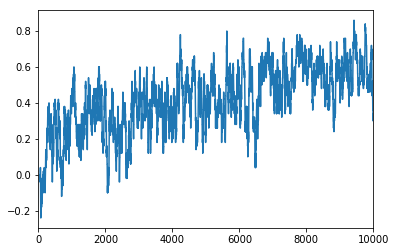

In [5]:
mean_results.plot()

In [6]:
x = results.winners.rolling(50)

In [9]:
results.head(10)

,winners
0,1.0
1,-1.0
2,0.0
3,-1.0
4,1.0
5,-1.0
6,1.0
7,1.0
8,-1.0
9,1.0


## Percentage wins for opponent

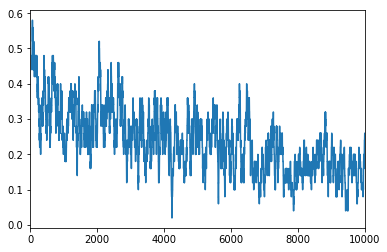

In [19]:
results.winners.rolling(50).aggregate(lambda s: (s==-1).sum()/50).plot()

## Action-Value analysis

In [3]:
top_qvals = sorted([(state,action,val) for state,avmap in test_bed.agent.q_values.items() for action,val in avmap.items()],
                   key=lambda sav: sav[2])[-10:]

In [4]:
i = 4
print(top_qvals[i])
print(test_bed.env._repr_flat(top_qvals[i][0]))

((-1, 0, 0, -1, 1, 0, 1, 0, -1), TTTAction(marker=1, position=Position(x=2, y=0)), 1.0)
O |   |  
-- --- --
O | X |  
-- --- --
X |   | O



In [8]:
bot_qvals = sorted([(state,action,val) for state,avmap in test_bed.agent.q_values.items() for action,val in avmap.items()],
                   key=lambda sav: sav[2])[:10]

In [22]:
i=0

In [23]:
i+=1
print(bot_qvals[i])
print(test_bed.env._repr_flat(bot_qvals[i][0]))

((0, -1, -1, -1, 0, 1, -1, 1, 1), TTTAction(marker=1, position=Position(x=1, y=1)), -0.999)
  | O | O
-- --- --
O |   | X
-- --- --
O | X | X



In [25]:
rand_qvals = random.sample([(state,action,val) for state,avmap in test_bed.agent.q_values.items() for action,val in avmap.items()], 10)

In [26]:
i=0

In [34]:
i+=1
print(rand_qvals[i])
print(test_bed.env._repr_flat(rand_qvals[i][0]))

((1, -1, 0, 0, 0, 1, -1, -1, 0), TTTAction(marker=1, position=Position(x=2, y=2)), 0.8099919000000001)
X | O |  
-- --- --
  |   | X
-- --- --
O | O |  

